# Black-Scholes-Merton formula
## ${{C}_{0}}={{S}_{t}}N\left( {{d}_{1}} \right)-K\exp \left( -r\left( T-t \right) \right)N\left( {{d}_{2}} \right)$
## ${{d}_{1}}=\frac{\log \left( \frac{{{S}_{t}}}{K} \right)+\left( r+\frac{{{\sigma }^{2}}}{2} \right)\left( T-t \right)}{\sigma \sqrt{T-t}}$
## ${{d}_{2}}=\frac{\log \left( \frac{{{S}_{t}}}{K} \right)+\left( r-\frac{{{\sigma }^{2}}}{2} \right)\left( T-t \right)}{\sigma \sqrt{T-t}}={{d}_{1}}-\sigma \sqrt{T-t}$
## $\begin{align}
  & \Delta C=\frac{\partial C}{\partial S}\Delta S+\frac{\partial C}{\partial \sigma }\Delta \sigma +\frac{\partial C}{\partial t}\Delta t+\frac{1}{2}\frac{{{\partial }^{2}}C}{\partial {{S}^{2}}}{{\left( \Delta S \right)}^{2}}+\ldots  \\ 
 & \,\,\,\,\,\,\,\,=\text{Delta}\times \Delta S+\text{Vega}\times \Delta \sigma +\text{Theta}\times \Delta t+\frac{1}{2}\text{Gamma}\times {{\left( \Delta S \right)}^{2}}+\ldots  \\ 
\end{align}$
## ${{\Delta }_{c}}=\frac{\partial {{C}_{t}}}{\partial {{S}_{t}}}=N\left( {{d}_{1}} \right)$
## $\gamma =\frac{{{\partial }^{2}}{{C}_{t}}}{\partial S_{t}^{2}}=\frac{{{\partial }^{2}}{{P}_{t}}}{\partial S_{t}^{2}}=\left( \frac{n\left( {{d}_{1}} \right)}{\sigma {{S}_{t}}\sqrt{T-t}} \right)$
## ${{\theta }_{c}}=\frac{\partial {{C}_{t}}}{\partial t}=-rK\exp \left( -r\left( T-t \right) \right)N\left( {{d}_{2}} \right)-\frac{1}{2}{{\sigma }^{2}}S_{t}^{2}\gamma $
## ${{\kappa }_{c}}=\frac{\partial {{C}_{t}}}{\partial K}=\left[ N\left( -{{d}_{2}} \right)-1 \right]\exp \left( -r\left( T-t \right) \right)$
## ${{\rho }_{c}}=\frac{\partial {{C}_{t}}}{\partial r}=K\left( T-t \right)N\left( {{d}_{2}} \right)\exp \left( -r\left( T-t \right) \right)$
## $Veg{{a}_{c}}=Veg{{a}_{p}}=\frac{\partial {{C}_{t}}}{\partial \sigma }=KN\left( {{d}_{1}} \right)\sqrt{T-t}$


In [7]:
# %load call_option.py
__version__ = '0.0.1'
__author__ = ' '
from scipy import stats
from math import log, sqrt, exp

class call_option:
    def __init__(self, S0, K, T, t, r, sigma):
        self.S0 = float(S0)
        self.K  = K
        self.T  = T
        self.t  = t
        self.r  = r
        self.sigma = sigma
        self.d1 = (log(S0/K)+(r+0.5*sigma**2)*(T-t))/(sigma*sqrt((T-t)))
        self.d2 = (log(S0/K)+(r-0.5*sigma**2)*(T-t))/(sigma*sqrt((T-t)))

    def __del__(self):
        class_name =self.__class__.__name__
        print(class_name, ':delete our call_option obj')

    def val(self):
        val=(self.S0*stats.norm.cdf(self.d1, 0.0, 1.0)-self.K*exp(-self.r*(self.T-self.t))*stats.norm.cdf(self.d2, 0.0, 1.0))
        return val

    def delta(self):
        delta=stats.norm.cdf(self.d1, 0.0, 1.0)
        return delta

    def gamma(self):
        gamma=stats.norm.pdf(self.d1, 0.0, 1.0)/(self.S0*self.sigma*sqrt(self.T-self.t))
        return gamma

    def theta(self,gamma):
        theta = -self.r*self.K*(sqrt(self.T-self.t))*stats.norm.cdf(self.d2)-0.5*gamma*(self.S0*self.sigma)*(self.S0*self.sigma)
        return theta

    def kappa(self):
        kappa= (stats.norm.cdf(-self.d2)-1.00)*exp(-self.r*(self.T-self.r))
        return kappa

    def rho(self):
        rho=self.K*(self.T-self.t)*stats.norm.cdf(self.d2)*exp(-self.r*(self.T-self.t))
        return rho

    def vega(self):
        vega = self.K * stats.norm.cdf(self.d1, 0.0, 1.0) * sqrt(self.T - self.t)
        return vega

    def impvol(self, C0, sigma_est= 0.2, N= 1000):
        opts = call_option(self.S0, self.K, self.T, self.t, self.r, sigma_est)
        for i in range(N):
            opts.sigma =opts.sigma-(opts.val()-C0)/opts.vega()
        return opts.sigma

    def prt_option_info(self):
        call_price=call_option(self.S0, self.K, self.T, self.t, self.r, self.sigma)
        value=call_price.val()
        veg=call_price.vega()
        delt=call_price.delta()
        gam=call_price.gamma()
        thet=call_price.theta(gam)
        kapp=call_price.kappa()
        rh=call_price.rho()
        iv=call_price.impvol(C0=value)
        print('Hello World!')
        print('When we assume \nS0=%f K=%f r=%f sigma=%f' %(self.S0, self.K, self.r, self.sigma))
        print('The length T\t=%f and the start time t\t=%f' %(self.T,self.t))
        print('The price of call option \t=\t %f' %value)
        print ('==============The Greek info================')
        print('The Delta of call option \t=\t %f' % delt)
        print('The Gamma of call option \t=\t %f' % gam)
        print('The Theta of call option \t=\t %f' % thet)
        print('The Kappa of call option \t=\t %f' % kapp)
        print('The Rho of call option \t\t=\t %f' % rh)
        print('The Vega of call option \t=\t %f' %veg)
        print('The implied volatility \t\t=\t %f' %iv)
        #return  

# 下面我们来演示如何运行“主程序”
##  注意这种写代码的结构

In [15]:
# %load demo_bsm_call_main.py
__version__ = '0.0.1'
__author__ = 'yf'

from call_option import *

def main():
    ST=50.00   #the price of underlying asset
    K=45.00    #the strike price
    T=1.0       #the length of call option contract
    t=0.0       #the initial time
    r=0.05      #risk-free rate
    sigma=0.25  #the volatility
    S0=ST*exp(-r*T)
    call_price=call_option(S0, K, T, t, r, sigma)
    call_price.prt_option_info()
    #del call_price

if __name__ == "__main__":
    main()

call_option :delete our call_option obj
When we assume 
S0=47.561471 K=45.000000 r=0.050000 sigma=0.250000
The length T	=1.000000 and the start time t	=0.000000
The price of call option 	=	 7.263615
==============The Greek info================
The Delta of call option 	=	 0.707619
The Gamma of call option 	=	 0.028898
The Theta of call option 	=	 -3.430091
The Kappa of call option 	=	 -0.587952
The Rho of call option 		=	 26.391783
The Vega of call option 	=	 31.842853
The implied volatility 		=	 24.413612
call_option :delete our call_option obj
call_option :delete our call_option obj


# 蒙特卡罗模拟与欧式期权定价
## 蒙特卡罗计算欧式期权定价公式的思路其实非常简单，要点就是三点：
## 我们要模拟标的物，也就是股票价格的走势，我们将股票价格的走势假定为其满足对数正态分布，也就是股票价格满足以下式子：
## $\log {{S}_{t}}=\log {{S}_{t-\Delta t}}+\left( r-\frac{1}{2}{{\sigma }^{2}} \right)\Delta t+\sigma \sqrt{\Delta t}{{z}_{t}}$ 其中${{z}_{t}}\sim i.i.d\text{ N}\left( 0,1 \right)$ 
### 我们要建立一个期权定价的收益准则，即在何种情况下该期权应该获利。当然庆幸的是，我们研究的仅是欧式期权，我们知道欧式期权的收益准则非常简单，无非就是：
## ${{C}_{0}}={{e}^{-rT}}\max \left( {{S}_{T}}-K,0 \right)$
### 我们利用蒙特卡罗的模拟技术，模拟无数次未来标的物价格的走势（路径），然后根据欧式期权的收益准则，计算每一个模拟路径的可能的期权收益，然后求其均值，即：
## ${{C}_{0}}={{e}^{-rT}}\left( \frac{1}{N} \right)\sum\limits_{i=1}^{N}{\left\{ \max \left( {{S}^{i}}_{T}-K,0 \right) \right\}}$
### 我们简单写了一个Python的小程序来实现以上的量化定价策略，然后我们绘制了三个图，第一个图演示我们模拟的未来股价的走势，左下的图，我们绘制了模拟走势的股价的直方图，而右下模拟的是${{S}^{i}}_{T}-K$的分布，这个图说明啥呢？你可以看见有很多的结果出现在零处，也就是说，很多模拟结果显示，${{S}^{i}}_{T}-K$都是为零的，为零的情形都是表示不行权，也就是说，如果资产价格满足对数正态分布，很多时候当你买了期权，其实你能行权的概率并不高，很多时候都行不了权。


# 下面我们来演示蒙特卡罗方法的期权定价。数学原理完全一样。写代码的方法不一样。
## 第一种方法是基于 for-loop
## 第二种方法是基于 矢量化方法（vectorization）
### 下面我们看看第一种方法： for-loop 注意观察一下运行代码需要的时间。

In [13]:
# %load mc_european_optionpricing_method1.py
from time import time
import math as mh 
import random as rd 

rd.seed(20000)
t0=time()
S0=50.00;K=55.00;T=1.0
r=0.05;sigma=0.2;M=50
dt=T/M;Iter=300000

S=[]
for i in range(Iter):
    path=[]
    for t in range(M+1):
        if t==0:
            path.append(S0)
        else:
            z = rd.gauss(0.0,1.0)
            St= path[t-1]*mh.exp((r-0.50*(sigma**2))*dt+sigma*mh.sqrt(dt)*z)
            path.append(St)
    S.append(path)

sum_val=0.0
for path in S:
    sum_val = sum_val+max(path[-1]-K,0)

C0=mh.exp(-r*T)*sum_val/Iter

time_comsume=time()-t0
print("European Option Price=",C0)
print("Time used=",time_comsume,"(seconds)")





European Option Price= 3.0126656292980014
Time used= 32.17306089401245 (seconds)


## 下面看看第二种方法，即基于矢量化方法。注意一下程序的运行时间。

European Option Price= 7.27470766799
Time used= 8.75355839729309 (seconds)


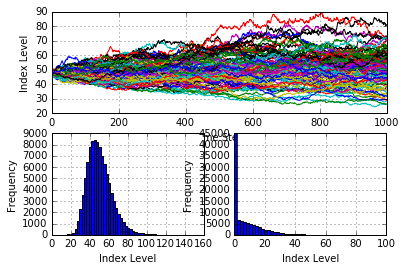

In [16]:
# %load mc_european_optionpricing_method2.py
%matplotlib inline
import math as mh
import numpy as np
from time import time
import matplotlib.pyplot as plt

np.random.seed(20000)
t0=time();
ST=50;K=45;T=1.0;
r=0.05;sigma=0.25;
S0=ST*np.exp(-r*T);
M=1000;
dt=T/M;I=100000

S=S0*np.exp(np.cumsum((r-0.5*sigma**2)*dt+sigma
                      *mh.sqrt(dt)*np.random.standard_normal((M+1,I)),axis=0))
S[0]=S0

C0=mh.exp(-r*T)*sum(np.maximum(S[-1]-K,0))/I

time_comsume=time()-t0
print('European Option Price=',C0)
print('Time used=',time_comsume,'(seconds)')


plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,1,1)
plt.plot(S[:,:100])
plt.grid(True)
plt.xlabel('Time Step')
plt.ylabel('Index Level')

plt.subplot(2,2,3)
plt.hist(S[-1],bins=50)
plt.grid(True)
plt.xlabel('Index Level')
plt.ylabel('Frequency')

plt.subplot(2,2,4)
plt.hist(np.maximum(S[-1]-K,0),bins=50)
plt.grid(True)
plt.xlabel('Index Level')
plt.ylabel('Frequency')

plt.show()
